## Exploratory Data Analysis for Global Superstore

The Global Superstore dataset has a great deal of info we can use to set up KPIs and a dashboard for stakeholders. In the following analysis we will attempt to answer the following questions:


### Product Analysis

* __Which products have increased sales over the years?__
* __Which product generates the most profit?__
* __Which top selling products are seasonal buys?__
* __Do some products sell more in certain regions than others? If so which regions?__



### Sales Analysis

* __What are the YTD sales Year over Year?__
* __Which months have the highest sales?__
* __Which country has the highest sales?__
* __Which shipment mode has the highest sales?__



### Customer Analysis

* __Show the customer frequency of purchase__
* __Who are the top 5 customers by profit each year?__
* __Who are the top 5 customers by sales each year?__
* __Show top 5 customer growth over years avalaible__





***Importing the necessary libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

***Now time to load the excel data here and check it***

In [3]:
df = pd.read_excel("Global_Superstore2.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


<br><br>
***We have two columns with date data, 'Order date' and 'Ship date'. We will change them to date time format for further calculations***
<br>


In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format= '%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format= '%d-%m-%Y')

<br>*Lets check the shape of the data*
<br>

In [7]:
df.shape

(51290, 24)

- **There are total 51,290 rows and 24 columns in the data**

<br><br>
***Now lets check all the column types and understand more about their types***
<br>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

- **There are 7 columns with numeric data, 2 columns with datetime data and 15 column with object/categorical data**

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Order Priority'],
      dtype='object')

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost'],
      dtype='object')

<br> ***Checking for null values***

In [9]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

- **Postal Code has 41,296 missing data**

***Lets do a quick statistical analysis***

In [12]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


**Few things we notice from the stats:**
- Average Sales revenue for each orders is 246, with min and max sales ranging from 0.44 to 22638
- Maximum discount given was 85%, with an average discount given was 14.3%
- Profit has negative values also, meaning there was loss in some cases
- Shipping cost is varied ranging from 0 to 933.57


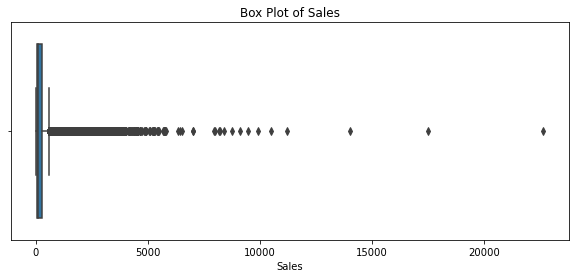

In [21]:
plt.figure(figsize =(10,4))
sns.boxplot(x=df['Sales'])
plt.xlabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

- ***There are few outliers in the Sales data over 10,000 which skews the Sales data***


### Product Analysis

#### *Which products have increased sales over the years?*

Lets look at number of products we are dealing with


In [26]:
df['Product Name'].nunique()

3788

***We have 3788 products in total***

Next let's extract the year from each order date to a new 'Year' column.

In [29]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year

In [37]:
# doing a total sum of sales each products year-wise

prod_year_wise = df.groupby(['Product Name','Year'])['Sales'].sum().reset_index()
prod_year_wise

,Product Name,Year,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2014,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2012,6.608
2,"#10 Gummed Flap White Envelopes, 100/Box",2013,24.780
3,"#10 Gummed Flap White Envelopes, 100/Box",2014,9.912
4,#10 Self-Seal White Envelopes,2013,86.502
...,...,...,...
12764,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,2014,205.086
12765,netTALK DUO VoIP Telephone Service,2011,335.936
12766,netTALK DUO VoIP Telephone Service,2012,230.956
12767,netTALK DUO VoIP Telephone Service,2013,377.928


In [39]:
# turning the above dataframe into a pivot table

prod_pivot_df = pd.pivot_table(prod_year_wise, values='Sales', index=['Year'], columns=['Product Name'])
prod_pivot_df

Product Name,"""While you Were Out"" Message Book, One Form per Page","#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",#6 3/4 Gummed Flap White Envelopes,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",...,Zebra ZM400 Thermal Label Printer,Zebra Zazzle Fluorescent Highlighters,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
Year,,,,,,,,,,,,,,,,,,,,,
2011,NaN,NaN,NaN,156.700,62.928,22.920,NaN,NaN,541.216,5.88,...,NaN,38.912,29.328,NaN,NaN,NaN,39.980,NaN,32.382,335.936
2012,NaN,6.608,NaN,12.536,134.596,NaN,113.328,23.76,NaN,44.10,...,6965.7,NaN,8.112,105.980,NaN,251.40,NaN,NaN,43.176,230.956
2013,NaN,24.780,86.502,235.050,NaN,22.920,NaN,NaN,1248.960,NaN,...,NaN,19.456,9.048,169.568,55.992,159.22,55.972,NaN,161.910,377.928
2014,25.228,9.912,22.180,84.618,89.148,100.848,62.960,47.52,915.904,NaN,...,NaN,42.560,35.256,137.774,643.908,67.04,119.940,223.888,205.086,167.968


***The elements in the pivot table are ready. Now we will calculate the percentage change in sales by every year***

In [41]:
# Calculating percent change in sales 

pctpivot_df = prod_pivot_df.pct_change()
pctpivot_df

Product Name,"""While you Were Out"" Message Book, One Form per Page","#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",#6 3/4 Gummed Flap White Envelopes,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",...,Zebra ZM400 Thermal Label Printer,Zebra Zazzle Fluorescent Highlighters,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
Year,,,,,,,,,,,,,,,,,,,,,
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,-0.92,1.138889,0.000000e+00,NaN,NaN,0.000000,6.5,...,NaN,0.0000,-0.723404,NaN,NaN,NaN,0.000000,NaN,0.333333,-0.312500
2013,NaN,2.75,NaN,17.75,0.000000,2.220446e-16,0.000000,0.0,1.307692,0.0,...,0.0,-0.5000,0.115385,0.6000,NaN,-0.366667,0.400000,NaN,2.750000,0.636364
2014,NaN,-0.60,-0.74359,-0.64,-0.337662,3.400000e+00,-0.444444,1.0,-0.266667,0.0,...,0.0,1.1875,2.896552,-0.1875,10.5,-0.578947,1.142857,NaN,0.266667,-0.555556


In [79]:
# stacking the pivot table to a mormal dataframe with percent change in sales as a column

pctchg = pctpivot_df.stack().reset_index(name='Pct_Change')
pctchg

,Year,Product Name,Pct_Change
0,2012,"#10 White Business Envelopes,4 1/8 x 9 1/2",-0.920000
1,2012,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",1.138889
2,2012,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",0.000000
3,2012,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",0.000000
4,2012,1/4 Fold Party Design Invitations & White Enve...,6.500000
...,...,...,...
10279,2014,iHome FM Clock Radio with Lightning Dock,10.500000
10280,2014,iKross Bluetooth Portable Keyboard + Cell Phon...,-0.578947
10281,2014,iOttie HLCRIO102 Car Mount,1.142857
10282,2014,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,0.266667


In [136]:
top_10 = pctchg.sort_values(by = 'Pct_Change', ascending = False).head(10)
top_10

,Year,Product Name,Pct_Change
3550,2013,"Belkin Keyboard, USB",73.000000
7684,2014,"Eaton Memo Slips, Premium",64.744444
9902,2014,"Tenex Door Stop, Duo Pack",61.250000
4900,2013,"Ikea Library with Doors, Traditional",57.750000
255,2012,"Apple Signal Booster, Cordless",54.500000
2514,2012,"Sauder Stackable Bookrack, Mobile",52.055556
6784,2014,"Advantus Stacking Tray, Durable",51.100000
3954,2013,"Cuisinart Blender, Black",48.966667
665,2012,"Cameo Interoffice Envelope, with clear poly wi...",46.500000
6569,2014,3.6 Cubic Foot Counter Height Office Refrigerator,45.000000


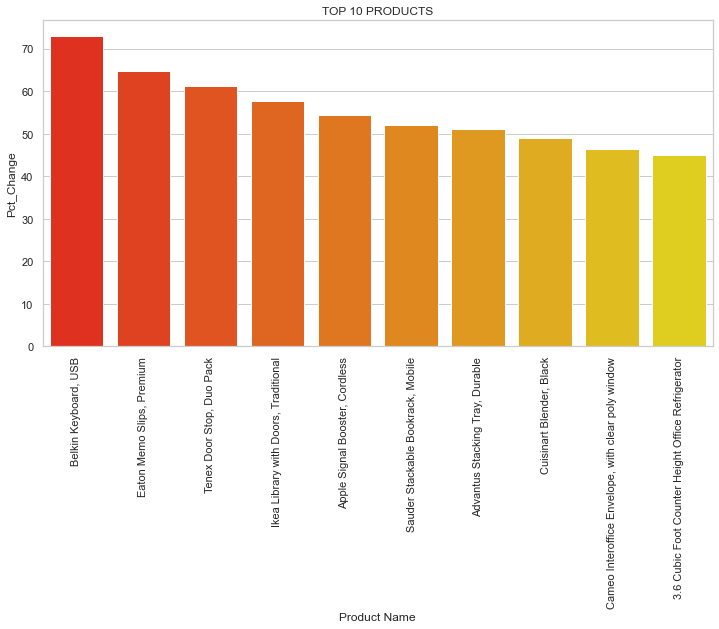

In [145]:
plt.figure(figsize=(12,6))
sns.barplot(x="Product Name", y="Pct_Change", palette="autumn", data=top_10)
plt.xticks(rotation=90)
plt.title("TOP 10 PRODUCTS")
plt.show()

***These 10 products are the ones with a highest increase in sales with the years in the total span of 2011-2014*** 

<br><br>
- **We can do a more detailed analysis with taking into consideration the top 5 products in every year with highest percentage increase in sales** 

In [49]:
topproduct2014 = pctchg[pctchg['Year'] == 2014].sort_values(by='Pct_Change', ascending=False, ignore_index=True).head(5)
topproduct2014

,Year,Product Name,Pct_Change
0,2014,"Eaton Memo Slips, Premium",64.744444
1,2014,"Tenex Door Stop, Duo Pack",61.250000
2,2014,"Advantus Stacking Tray, Durable",51.100000
3,2014,3.6 Cubic Foot Counter Height Office Refrigerator,45.000000
4,2014,"Nokia Audio Dock, Cordless",44.277778


In [50]:
topproduct2013 = pctchg[pctchg['Year'] == 2013].sort_values(by='Pct_Change', ascending=False, ignore_index=True).head(5)
topproduct2013

,Year,Product Name,Pct_Change
0,2013,"Belkin Keyboard, USB",73.000000
1,2013,"Ikea Library with Doors, Traditional",57.750000
2,2013,"Cuisinart Blender, Black",48.966667
3,2013,"Boston Pencil Sharpener, Fluorescent",44.625000
4,2013,"Acme Shears, High Speed",40.222222


In [51]:
topproduct2012 = pctchg[pctchg['Year'] == 2012].sort_values(by='Pct_Change', ascending=False, ignore_index=True).head(5)
topproduct2012

,Year,Product Name,Pct_Change
0,2012,"Apple Signal Booster, Cordless",54.500000
1,2012,"Sauder Stackable Bookrack, Mobile",52.055556
2,2012,"Cameo Interoffice Envelope, with clear poly wi...",46.500000
3,2012,"Elite Trimmer, High Speed",44.855556
4,2012,"Hon Removable Labels, Laser Printer Compatible",36.200000


In [56]:
# Listing down the list of 
top_products = pd.concat([topproduct2014, topproduct2013,topproduct2012]).reset_index(drop = True)
top_products

,Year,Product Name,Pct_Change
0,2014,"Eaton Memo Slips, Premium",64.744444
1,2014,"Tenex Door Stop, Duo Pack",61.250000
2,2014,"Advantus Stacking Tray, Durable",51.100000
3,2014,3.6 Cubic Foot Counter Height Office Refrigerator,45.000000
4,2014,"Nokia Audio Dock, Cordless",44.277778
5,2013,"Belkin Keyboard, USB",73.000000
6,2013,"Ikea Library with Doors, Traditional",57.750000
7,2013,"Cuisinart Blender, Black",48.966667
8,2013,"Boston Pencil Sharpener, Fluorescent",44.625000
9,2013,"Acme Shears, High Speed",40.222222


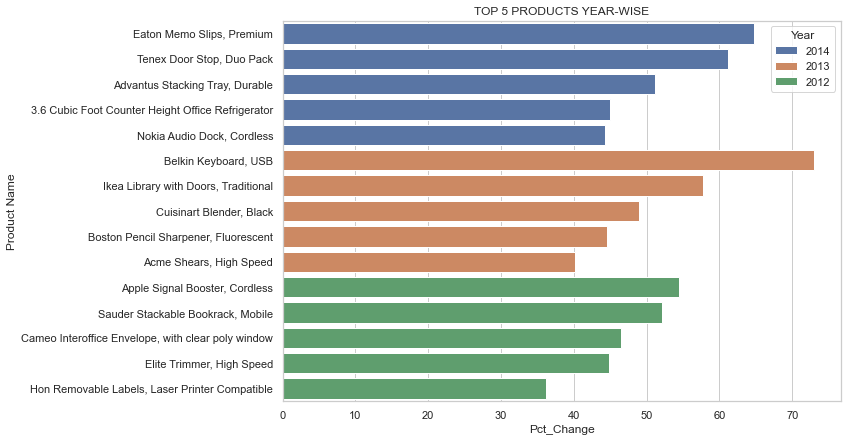

In [135]:
plt.figure(figsize=(10,7))
sns.barplot(y="Product Name", x="Pct_Change", hue="Year", data=top_products,  hue_order=[2014,2013,2012],dodge=False)
plt.title("TOP 5 PRODUCTS YEAR-WISE")
plt.show()


<br><br>***Which Product generated most Profits?***

We are considering the products generating maximum total profit over the total span of 2011-2014

In [147]:
top_profits = df.groupby(['Product Name'])['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False).head(10)
top_profits

,Product Name,Profit
866,Canon imageCLASS 2200 Advanced Copier,25199.9280
970,"Cisco Smart Phone, Full Size",17238.5206
2415,"Motorola Smart Phone, Full Size",17027.1130
1926,"Hoover Stove, Red",11807.9690
3098,"Sauder Classic Bookcase, Traditional",10672.0730
1714,"Harbour Creations Executive Leather Armchair, ...",10427.3260
2501,"Nokia Smart Phone, Full Size",9938.1955
971,"Cisco Smart Phone, with Caller ID",9786.6408
2502,"Nokia Smart Phone, with Caller ID",9465.3257
589,"Belkin Router, USB",8955.0180


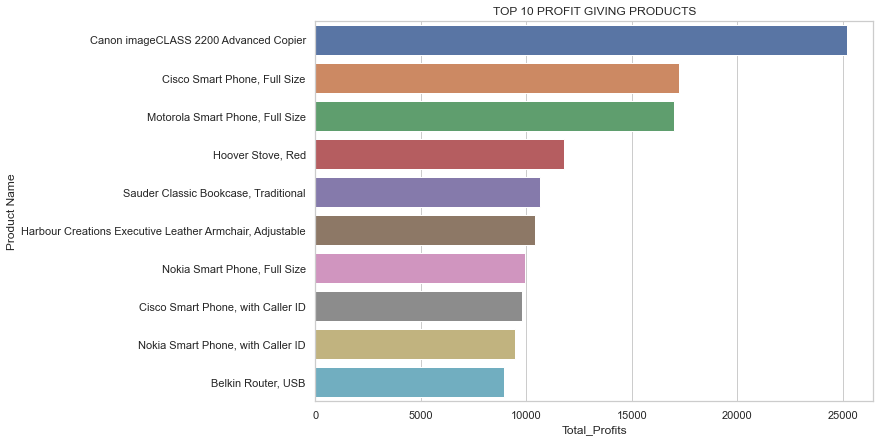

In [150]:
plt.figure(figsize=(10,7))
sns.barplot(y="Product Name", x="Profit", data=top_profits)
plt.title("TOP 10 PROFIT GIVING PRODUCTS")
plt.xlabel('Total_Profits')
plt.ylabel('Product Name')
plt.show()

***Which top selling products are seasonal buys?***

Let's extract the year from each order date to a new 'Month' column.


In [151]:
df['Month'] = pd.DatetimeIndex(df['Order Date']).month

In [163]:
# doing a total sum of sales each products month-wise

prod_month_wise = df.groupby(['Product Name','Month'])['Sales'].sum().reset_index()
prod_month_wise

,Product Name,Month,Sales
0,"""While you Were Out"" Message Book, One Form pe...",9,8.904
1,"""While you Were Out"" Message Book, One Form pe...",10,7.420
2,"""While you Were Out"" Message Book, One Form pe...",11,8.904
3,"#10 Gummed Flap White Envelopes, 100/Box",1,16.520
4,"#10 Gummed Flap White Envelopes, 100/Box",4,8.260
...,...,...,...
25099,netTALK DUO VoIP Telephone Service,5,83.984
25100,netTALK DUO VoIP Telephone Service,6,125.976
25101,netTALK DUO VoIP Telephone Service,7,167.968
25102,netTALK DUO VoIP Telephone Service,9,188.964


In [164]:
# turning the above dataframe into a pivot table

prod_pivot_df = pd.pivot_table(prod_month_wise, values='Sales', index=['Month'], columns=['Product Name'])
prod_pivot_df

Product Name,"""While you Were Out"" Message Book, One Form per Page","#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",#6 3/4 Gummed Flap White Envelopes,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",...,Zebra ZM400 Thermal Label Printer,Zebra Zazzle Fluorescent Highlighters,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
Month,,,,,,,,,,,,,,,,,,,,,
1,NaN,16.52,NaN,125.360,17.480,18.336,NaN,NaN,NaN,NaN,...,NaN,NaN,2.808,NaN,111.984,NaN,NaN,NaN,NaN,377.928
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19.456,NaN,105.980,167.976,NaN,39.980,NaN,71.960,NaN
3,NaN,NaN,NaN,47.010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19.456,NaN,169.568,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,8.26,8.872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.592,13.728,NaN,NaN,209.50,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,30.560,62.960,NaN,208.16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.984
6,NaN,NaN,NaN,37.608,13.984,NaN,NaN,NaN,208.16,NaN,...,NaN,NaN,6.240,NaN,279.960,41.90,NaN,NaN,NaN,125.976
7,NaN,NaN,NaN,NaN,48.944,NaN,NaN,NaN,416.32,NaN,...,NaN,18.240,28.080,NaN,55.992,NaN,23.988,NaN,179.900,167.968
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.80,NaN,...,NaN,9.728,NaN,NaN,NaN,NaN,NaN,NaN,43.176,NaN
9,8.904,NaN,33.270,90.886,62.928,24.448,NaN,15.84,NaN,NaN,...,NaN,19.456,NaN,NaN,NaN,NaN,NaN,79.960,75.558,188.964


***From an initial analysis most of the products looks like seasonal***


### *Do some products sell more in certain regions than others? If so which regions?*

**First we are checking the unique market regions present in the data**

In [169]:
df['Market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [225]:
# Getting the sales of products in different areas

prod_market_wise = df.groupby(['Product Name','Market'])['Sales'].sum().reset_index()
prod_market_wise

,Product Name,Market,Sales
0,"""While you Were Out"" Message Book, One Form pe...",US,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",US,41.300
2,#10 Self-Seal White Envelopes,US,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",US,488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",US,286.672
...,...,...,...
11052,iKross Bluetooth Portable Keyboard + Cell Phon...,US,477.660
11053,iOttie HLCRIO102 Car Mount,US,215.892
11054,iOttie XL Car Mount,US,223.888
11055,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,US,442.554


<br>*Finding the top 5 products in every market regions and listing them down*<br>***e.g. Canon imageCLASS 2200 Advanced Copier, Fellowes PB500 Electric Punch Plastic Comb Bin..., Cisco TelePresence System EX90 Videoconferenci..., HON 5400 Series Task Chairs for Big and Tall, GBC DocuBind TL300 Electric Binding System*** *are the top 5 products in US market.<br>Similarly we get all the top 5 products in every market and compare them*

In [226]:

topproductAPAC = prod_market_wise[prod_market_wise['Market'] == 'APAC'].sort_values(by='Sales', ascending=False, ignore_index=True).head(5)
topproductLATAM = prod_market_wise[prod_market_wise['Market'] == 'LATAM'].sort_values(by='Sales', ascending=False, ignore_index=True).head(5)
topproductEU = prod_market_wise[prod_market_wise['Market'] == 'EU'].sort_values(by='Sales', ascending=False, ignore_index=True).head(5)
topproductUS = prod_market_wise[prod_market_wise['Market'] == 'US'].sort_values(by='Sales', ascending=False, ignore_index=True).head(5)
topproductEMEA = prod_market_wise[prod_market_wise['Market'] == 'EMEA'].sort_values(by='Sales', ascending=False, ignore_index=True).head(5)
topproductAfrica = prod_market_wise[prod_market_wise['Market'] == 'Africa'].sort_values(by='Sales', ascending=False, ignore_index=True).head(5)
topproductCanada = prod_market_wise[prod_market_wise['Market'] == 'Canada'].sort_values(by='Sales', ascending=False, ignore_index=True).head(5)

# Concatenating the values into a dataframe
top_products = pd.concat([topproductAPAC, topproductLATAM, topproductEU, topproductUS, topproductEMEA, topproductAfrica, topproductCanada]).reset_index(drop = True)
top_products.head()


,Product Name,Market,Sales
0,"Motorola Smart Phone, Full Size",APAC,34261.5270
1,"Nokia Smart Phone, with Caller ID",APAC,30808.2402
2,"Apple Smart Phone, Full Size",APAC,27251.1561
3,"Hon Executive Leather Armchair, Adjustable",APAC,26106.2871
4,"Office Star Executive Leather Armchair, Adjust...",APAC,23774.0400


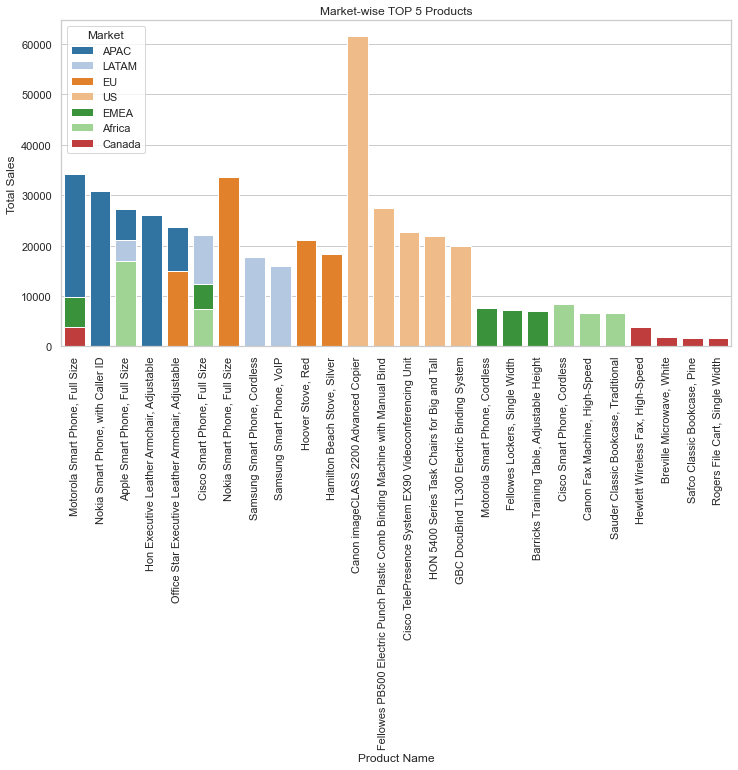

In [227]:
# Plotting the data for proper visualisation

plt.figure(figsize=(12,6))
sns.barplot(y="Sales", x='Product Name', hue="Market", palette= 'tab20', data=top_products, dodge= False)
plt.xticks(rotation = 90)
plt.title('Market-wise TOP 5 Products')
plt.ylabel('Total Sales')
plt.show()

We can get some interesting insights about the sales data from the plot

- **Top products in US markets are not in top selling products in any other markets**
- **Nokia smartphone is a highest selling product in EU market where as Motorola smart phone is top selling in Canada, EMEA, APAC markets**
- **Arm chair is a top selling product, but the brand selling in US is not same as the ones selling in EU and APAC countries**